## Otimização de Despesas com Marketing na Y.Afisha.

O objetivo deste projeto é utilizar análise de dados para otimizar as despesas de marketing da Y.Afisha. Com o crescimento contínuo da empresa, torna-se fundamental garantir que o investimento em marketing seja eficiente e gere o máximo de retorno possível.

## Coleta e Preparação dos Dados.

Serão identificadas e reunidas todas as fontes de dados relevantes, incluindo informações de gastos com publicidade, campanhas realizadas, canais de marketing utilizados e métricas de desempenho associadas.

In [1]:
import pandas as pd
import matplotlib as plot
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
orders = pd.read_csv('/datasets/orders_log_us.csv')
cost = pd.read_csv('/datasets/costs_us.csv')
visits = pd.read_csv('/datasets/visits_log_us.csv')

## orders:

Arquivo de despejo com todos os pedidos feitos durante o período.


In [3]:
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [5]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


## Primeiras observações orders:

* uid — identificador unívoco do usuário que faz um pedido.
* Buy Ts — data e hora do pedido.
* Revenue — a receita da Y.Afisha com o pedido.

O conjunto de dados não possui valores ausentes, entretanto a coluna Buy Ts precisa ter seu tipo modificado. 

In [6]:
orders.rename(columns={
    'Buy Ts': 'buy_ts',
    'Revenue': 'revenue',
    'Uid': 'uid'
}, inplace=True)


In [7]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

## cost:  

Estatísticas de despesas com marketing

In [8]:
cost.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [9]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [10]:
cost.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


## Primeiras observações cost:

* source_id — identificador da origem de anúncio
* dt — data
* costs — despesas com esta origem de anúncio neste dia


O conjunto de dados não possui valores ausentes, entretanto a coluna dt precisa ter seu tipo modificado. 


In [11]:
cost.rename(columns={'Souce_id': 'source_id'}, inplace=True)


In [12]:
cost['dt'] = pd.to_datetime(cost['dt'])

## visits:

Logs do servidor com dados sobre os acessos a Y.Afisha de janeiro de 2017 até dezembro de 2018

In [13]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [14]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [15]:
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


## Primeiras observações visits:

* uid — identificador unívoco do usuário
* Device — dispositivo do usuário
* Start Ts — data e hora do início da sessão
* End Ts — data e hora do final da sessão
* Source Id — identificador da origem do anúncio através do qual o usuário chegou

O conjunto de dados não possui valores ausentes, entretanto a coluna Start TS e End TS precisam ter seu tipo modificado. 

In [16]:
visits.columns = [col.lower().replace(' ', '_') for col in visits.columns]
visits

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [17]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

## Identificação de Métricas Chave

# Produto:
* Quantas pessoas usam-no cada dia, semana e mês?
* Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).
* Que comprimento tem cada sessão?
* Com que frequência os usuários voltam?

In [18]:
visits['data'] = visits['start_ts'].dt.date 
visits['week'] = visits['start_ts'].dt.strftime('%Y-%U')
visits['month'] = visits['start_ts'].dt.strftime('%Y-%m')

In [19]:
person_day = visits.groupby('data')['uid'].nunique().mean()
print('A quantidade de acessos médios por dia é: ' + str(int(person_day)) )

A quantidade de acessos médios por dia é: 907


In [20]:
person_week = visits.groupby('week')['uid'].nunique().mean()
print('A quantidade de acessos médios por semana é: ' + str(int(person_week)) )

A quantidade de acessos médios por semana é: 5612


In [21]:
person_week = visits.groupby('month')['uid'].nunique().mean()
print('A quantidade de acessos médios por mês é: ' + str(int(person_week)) )

A quantidade de acessos médios por mês é: 23228


In [22]:
print("Há em média por dia:",int(visits.groupby('data').agg({'uid': 'count'}).mean()), 'sessões.')

Há em média por dia: 987 sessões.


In [23]:
visits['ts_time'] = (visits['end_ts']-visits['start_ts']).dt.seconds
print('duração média das sessões:', visits['ts_time'].mean())

duração média das sessões: 643.506488592098


## Relatorio de Produto. 

* A quantidade de Usuarios médios por dia é: 907
* A quantidade de Usuarios médios por semana é: 5612
* A quantidade de Usuarios médios por mês é: 23228
* Há em média por dia: 987 sessões.
* duração média das sessões: 643.506488592098 segundos.  


## vendas: 
* Quando as pessoas começam a comprar? 
* Quantos pedidos os clientes fazem durante um determinado período de tempo?
* Qual é o volume médio de uma compra ?
* Quanto dinheiro eles trazem para a empresa (LTV)?

In [24]:
group_session = visits.groupby('uid')['start_ts'].min()
group_sale = orders.groupby('uid')['buy_ts'].min()
sales_data = pd.merge(group_sale, group_session, on = 'uid')
sales_data['time_conversion'] = sales_data['buy_ts']- sales_data['start_ts']
print('Os clientes custumam demorar' ,sales_data['time_conversion'].median(), 'para realizar sua primeira compra')


Os clientes custumam demorar 0 days 00:16:00 para realizar sua primeira compra


In [25]:
orders['data'] = orders['buy_ts'].dt.date 
orders['week'] = orders['buy_ts'].dt.strftime('%Y-%U')
orders['month'] = orders['buy_ts'].dt.strftime('%Y-%m')
group_month = orders.groupby('month')['buy_ts'].count()
group_month

month
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
2017-11    5659
2017-12    6218
2018-01    4721
2018-02    5281
2018-03    5326
2018-04    3273
2018-05    4346
2018-06       1
Name: buy_ts, dtype: int64

In [26]:
print('o volume médio de uma compra é:', orders['revenue'].median())

o volume médio de uma compra é: 2.5


In [27]:
first_orders = orders.groupby('uid').agg({'month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
orders_ = pd.merge(orders,first_orders, on='uid')
cohorts = orders_.groupby(['first_order_month','month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report['first_order_month'] = pd.to_datetime(report['first_order_month'])
report['month'] = pd.to_datetime(report['month'])
report['age'] = (
    report['month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int') 
report['ltv'] = report['revenue'] / report['n_buyers']
output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='sum'
).round()
output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,5.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2017-07-01,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2017-08-01,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,
2017-09-01,6.0,1.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,,,
2017-10-01,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,
2017-11-01,5.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
2017-12-01,5.0,0.0,1.0,1.0,0.0,0.0,,,,,,
2018-01-01,4.0,0.0,0.0,0.0,0.0,,,,,,,
2018-02-01,4.0,0.0,0.0,0.0,,,,,,,,


In [28]:

clv_monthly = orders.groupby(['uid', 'month'])['revenue'].sum().reset_index().groupby('month')['revenue'].mean()
retention_rate = visits.groupby('month').apply(lambda x: x['uid'].duplicated().sum() / x['uid'].nunique())
LTV_monthly = clv_monthly * retention_rate / (1 - retention_rate)
print(f'O Lifetime Value (LTV) mensal é: {LTV_monthly}')


O Lifetime Value (LTV) mensal é: month
2017-06    1.531554
2017-07    2.186134
2017-08    1.819749
2017-09    2.342935
2017-10    2.288375
2017-11    3.075651
2017-12    3.632957
2018-01    1.998794
2018-02    2.491772
2018-03    2.937318
2018-04    2.182624
2018-05    2.351181
2018-06         NaN
dtype: float64


## relatorio de vendas 
* Os clientes custumam demorar 0 days 00:16:00 para realizar sua primeira compra
* No mês 6 de 2017 os clientes realizaram 2354 pedidos
* O volume médio de uma compra é: 2.5
* o ltv no mês 6 de 2017 foi de 1.531554

## marketing

* Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo
* Quanto custou a aquisição de clientes para cada origem?
* Os investimentos valeram a pena? (ROI)

In [29]:
print('Quantidade de dinheiro gasto ao total:', cost['costs'].sum())

Quantidade de dinheiro gasto ao total: 329131.62


In [30]:
cost_source = cost.groupby('source_id')['costs'].sum()
print('Quantidade de dinheiro gasto por origem:',cost_source )

Quantidade de dinheiro gasto por origem: source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


In [31]:
cost['month'] = cost['dt'].dt.strftime('%Y-%m')
cost_per_month = cost.groupby('month')['costs'].sum()
cost_per_month

month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Name: costs, dtype: float64

In [32]:
unique_users_per_source = visits.groupby('source_id')['uid'].nunique().reset_index()
unique_users_per_source.columns = ['source_id', 'unique_users']
total_costs_per_source = cost.groupby('source_id')['costs'].sum().reset_index()
cac_per_source = pd.merge(unique_users_per_source, total_costs_per_source, on='source_id')
cac_per_source['CAC'] = cac_per_source['costs'] / cac_per_source['unique_users']
print(cac_per_source[['source_id', 'CAC']])


   source_id       CAC
0          1  1.096546
1          2  1.631017
2          3  1.890439
3          4  0.731201
4          5  0.908434
5          9  0.595584
6         10  0.721766


In [33]:

monthly_revenue = orders.groupby('month')['revenue'].sum()
monthly_costs = cost.groupby('month')['costs'].sum()
ROI_monthly = (monthly_revenue - monthly_costs) / monthly_costs * 100

print(f'O Retorno sobre o Investimento (ROI) mensal é: {ROI_monthly}')


O Retorno sobre o Investimento (ROI) mensal é: month
2017-06   -46.947044
2017-07   -31.255129
2017-08   -40.781202
2017-09   -24.717560
2017-10   -22.947465
2017-11   -28.590230
2017-12    -5.028663
2018-01   -42.070443
2018-02   -21.888224
2018-03    -5.196995
2018-04   -24.367300
2018-05    -6.696688
2018-06          NaN
dtype: float64


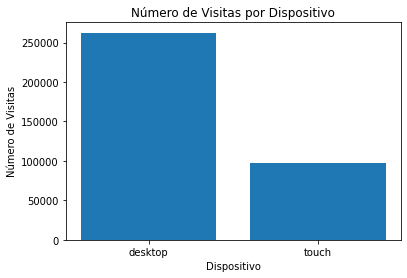

In [34]:

device_visits = visits.groupby('device')['uid'].count().reset_index()
plt.bar(device_visits['device'], device_visits['uid'])
plt.title('Número de Visitas por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Número de Visitas')
plt.show()


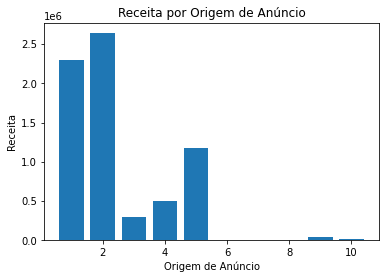

In [35]:

merged_data = visits.merge(orders, on='uid')
source_revenue = merged_data.groupby('source_id')['revenue'].sum().reset_index()
plt.bar(source_revenue['source_id'], source_revenue['revenue'])
plt.title('Receita por Origem de Anúncio')
plt.xlabel('Origem de Anúncio')
plt.ylabel('Receita')
plt.show()


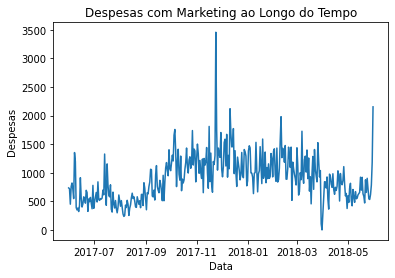

In [36]:

cost['dt'] = pd.to_datetime(cost['dt'])
daily_costs = cost.groupby('dt')['costs'].sum().reset_index()
plt.plot(daily_costs['dt'], daily_costs['costs'])
plt.title('Despesas com Marketing ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Despesas')
plt.show()


## relatorio de marketing
* Quantidade de dinheiro gasto ao total: 329131.62
* Quantidade de dinheiro gasto por origem:
1: 20833.27
2: 42806.04
3: 141321.63
4: 61073.60
5: 51757.10
9: 5517.49
10: 5822.49
* gasto por mês: 
2017-06: 18015.00
* cac de cada fonte: 
source_id       CAC
* 1:  1.096546
* 2:  1.631017
* 3:  1.890439
* 4:  0.731201
* 5:  0.908434
* 9:  0.595584
* 10:  0.721766
* O ROI foi negativo em todos os meses. 



Marketing
Distribuição Desigual dos Gastos: A variação nos gastos entre diferentes origens sugere que alguns canais são mais priorizados do que outros. Isso pode indicar uma estratégia deliberada ou uma oportunidade para reavaliar a eficácia de cada canal.

CAC Variável: O Custo de Aquisição de Cliente (CAC) varia entre as fontes, com algumas sendo mais eficientes que outras. Isso pode ser um indicador de onde otimizar ou reorganizar o orçamento.

ROI Negativo: O ROI negativo em todos os meses é uma séria preocupação e sugere que a estratégia de marketing atual não está proporcionando um retorno adequado sobre o investimento. Isso necessita de uma investigação profunda para identificar as causas e implementar correções.

Vendas
Tempo Rápido para Primeira Compra: O curto tempo para a primeira compra indica um funil de vendas eficaz, o que é positivo.

Volume Médio de Compras: O volume médio de 2.5 poderia ser explorado mais, talvez através de incentivos para compras maiores ou ofertas agrupadas.

LTV Positivo: O valor de 1.531554 para LTV é um bom sinal, embora possa haver espaço para melhoria através de aumentar a retenção ou o valor médio do pedido.

Produto
Engajamento do Usuário: A quantidade média de usuários e a duração das sessões sugerem um nível sólido de engajamento. No entanto, explorar maneiras de aumentar a duração média das sessões pode levar a uma maior satisfação e retenção do usuário.

Oportunidades de Crescimento: A distribuição diária, semanal e mensal dos usuários pode ser analisada para identificar tendências ou padrões que podem ser aproveitados para impulsionar o crescimento.

Conclusão Geral
Os dados apresentam uma imagem mista. Enquanto há sinais positivos, como um funil de vendas eficaz e um LTV positivo, existem áreas de preocupação significativas, principalmente em relação ao ROI negativo e à variação no CAC entre diferentes canais.

A revisão da estratégia de marketing, a otimização dos gastos com publicidade e uma análise mais profunda das métricas de engajamento dos produtos podem ser passos necessários. Implementar mudanças estratégicas e medir seu impacto ao longo do tempo será essencial para melhorar essas áreas e alcançar um crescimento sustentável e lucrativo.